# Vis√£o dos dados e desafios

## Dicion√°rio das colunas e dos dados:

Dados hist√≥ricos da Ibovespa (BVSP), retidados do site [https://br.investing.com](https://br.investing.com/indices/bovespa-historical-data), considerando dados di√°rios de cota√ß√µes em um per√≠odo entre **27/12/2020 √† 22/08/2023**.
> *Data da Consulta: 22/08/2023*


*  **Data**: A data em que a negocia√ß√£o ocorreu.
*  **Abertura**: O pre√ßo pelo qual um ativo come√ßou a ser negociado no dia em quest√£o.
*  **M√≠nimo**: O menor pre√ßo atingido pelo ativo durante o dia de negocia√ß√£o.
*  **M√°ximo**: O pre√ßo mais alto atingido pelo ativo durante o dia de negocia√ß√£o.
*  **Volume** (Vol.): A quantidade total de a√ß√µes (ou contratos) negociados durante o dia. Indica o interesse e a atividade dos investidores.
*  **Varia√ß√£o** (Var%): A diferen√ßa entre o pre√ßo de fechamento do dia atual e o pre√ßo de fechamento do dia anterior, geralmente expressa em porcentagem. Ela mostra a mudan√ßa no valor do ativo de um dia para o outro.



## Objetivos:

> Criar um modelo preditivo com dados da IBOVESPA (Bolsa de valores) para criar uma s√©rie temporal e prever diariamente o fechamento da base.

> Acur√°cia do modelo acima de 70%

# In√≠cio do projeto

## Importa√ß√£o das bases e primeiras an√°lises dos dados

In [ ]:
# importanto as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date, time, datetime, timedelta

from google.colab import drive # importar m√≥dulo do drive e upar base de dados pelo diret√≥rio
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
ibovespa_diario = pd.read_csv("drive/My Drive/Pos Tech Base de Dados/Tech Challenge Fase 2/Base de Dados/dados_ibovespa_dez00-ago23.csv", sep=",", parse_dates=[0], index_col="Data",dayfirst=True) # defini√ß√£o da coluna Data como index
ibovespa_diario.head()

√öltimo  Abertura   M√°xima   M√≠nima   Vol.    Var%
Data                                                          
2019-12-30  115.645   116.530  117.086  115.599  3,67M  -0,76%
2019-12-27  116.534   117.205  117.803  115.995  3,91M  -0,57%
2019-12-26  117.203   115.864  117.220  115.673  3,79M   1,16%
2019-12-23  115.863   115.119  115.863  114.964  4,00M   0,64%
2019-12-20  115.121   115.133  115.171  114.526  6,89M  -0,01%

In [ ]:
print("Range de datas:")
print(f"\tData inicial:",ibovespa_diario.index.min())
print(f"\tData final:",ibovespa_diario.index.max())

Range de datas:
	Data inicial: 2000-12-27 00:00:00
	Data final: 2023-08-22 00:00:00


In [ ]:
total = ibovespa_diario.shape[0]
print("Total de dados na base: ", total)

Total de dados na base:  5611


In [ ]:
ibovespa_diario.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5611 entries, 2019-12-30 to 2020-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   √öltimo    5611 non-null   float64
 1   Abertura  5611 non-null   float64
 2   M√°xima    5611 non-null   float64
 3   M√≠nima    5611 non-null   float64
 4   Vol.      5610 non-null   object 
 5   Var%      5611 non-null   object 
dtypes: float64(4), object(2)
memory usage: 306.9+ KB


Necess√°rio realizar alguns pr√©-processamentos nos dados:
<!-- * Colunas "√öltimo","Abertura", "M√°xima", "M√≠nima": Ajustar casa decimal (valor em milhar) e alterar o type para int. -->

* Vol: retirar caracteres "K" e "M" e tratar valores

* Var%: Retirar caracter "%".

## Tratamento e pr√©-processamento de dados da base

In [ ]:
# cols_int = ["√öltimo","Abertura", "M√°xima", "M√≠nima"]

# for column in cols_int:
#     ibovespa_diario[column] = (ibovespa_diario[column] * 1000).astype(int)
#     # ibovespa_diario[column] = ibovespa_diario[column].astype(int)

# ibovespa_diario.head()

In [ ]:
# fun√ß√£o para retirar caracteres n√£o numericos da coluna Volume
def convert_volume(vol):
    if isinstance(vol, str):
        if 'M' in vol:
            return float(vol.replace('M', '')) * 1000000
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1000
    return vol

ibovespa_diario = ibovespa_diario.replace(",",".", regex = True) # Tudo que √© v√≠rgula vira ponto
ibovespa_diario['Var%'] = ibovespa_diario['Var%'].replace("%"," ", regex = True).astype(float) # Tudo que √© v√≠rgula vira ponto
ibovespa_diario['Vol.'] = ibovespa_diario['Vol.'].apply(convert_volume)
ibovespa_diario['Vol.'] = round(ibovespa_diario['Vol.'].astype(float))
ibovespa_diario.head()

√öltimo  Abertura   M√°xima   M√≠nima       Vol.  Var%
Data                                                            
2019-12-30  115.645   116.530  117.086  115.599  3670000.0 -0.76
2019-12-27  116.534   117.205  117.803  115.995  3910000.0 -0.57
2019-12-26  117.203   115.864  117.220  115.673  3790000.0  1.16
2019-12-23  115.863   115.119  115.863  114.964  4000000.0  0.64
2019-12-20  115.121   115.133  115.171  114.526  6890000.0 -0.01

In [ ]:
ibovespa_diario.dtypes # valida√ß√£o dos tipos de dados

√öltimo      float64
Abertura    float64
M√°xima      float64
M√≠nima      float64
Vol.        float64
Var%        float64
dtype: object

> Tratamento das colunas realizada, com exce√ß√£o da coluna Vol. que ainda est√° em float. Ao fazer a transforma√ß√£o, ocorreu um erro sinalizando que existe um dado nulo nesta coluna.

### Identifica√ß√£o de dados nulos ou duplicados

In [ ]:
val_duplicated = ibovespa_diario.duplicated().sum()

print("Valida√ß√£o de dados duplicados:")
if val_duplicated > 0:
  print(f"\tExistem valores duplicados na base, √© necess√°rio investigar.")
else:
  print(f"\tN√£o esxistem valores duplicados na base!")

Valida√ß√£o de dados duplicados:
	N√£o esxistem valores duplicados na base!


In [ ]:
percent_nulos = 100*((ibovespa_diario.isnull().sum())/(len(ibovespa_diario))) # avalia√ß√£o de dados nulos
print(percent_nulos)

√öltimo      0.000000
Abertura    0.000000
M√°xima      0.000000
M√≠nima      0.000000
Vol.        0.017822
Var%        0.000000
dtype: float64


Existem valores nulos na coluna Vol.

In [ ]:
ibovespa_diario.loc[ibovespa_diario['Vol.'].isnull()]

√öltimo  Abertura  M√°xima  M√≠nima  Vol.  Var%
Data                                                    
2016-02-10  40.377    40.592  40.592   39.96   NaN -0.53

In [ ]:
ibovespa_diario['Vol.'] = ibovespa_diario['Vol.'].fillna(value = 0) # alterando o valor nulo por 0
ibovespa_diario['Vol.'] = ibovespa_diario['Vol.'].astype(int) # transforma√ß√£o do tipo para inteiro
ibovespa_diario.head()

√öltimo  Abertura   M√°xima   M√≠nima     Vol.  Var%
Data                                                          
2019-12-30  115.645   116.530  117.086  115.599  3670000 -0.76
2019-12-27  116.534   117.205  117.803  115.995  3910000 -0.57
2019-12-26  117.203   115.864  117.220  115.673  3790000  1.16
2019-12-23  115.863   115.119  115.863  114.964  4000000  0.64
2019-12-20  115.121   115.133  115.171  114.526  6890000 -0.01

Por fim, cria√ß√£o de uma coluna com o dia da semana para avaliarmos distribui√ß√£o

In [ ]:
def obter_dia_da_semana(data_index):
    try:
        data = datetime.strptime(data_index, '%d/%m/%Y')
        dias_da_semana = ['Segunda-feira', 'Ter√ßa-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'S√°bado', 'Domingo']
        dia_da_semana = dias_da_semana[data.weekday()]
        return dia_da_semana
    except ValueError:
        return "Data inv√°lida"

ibovespa_diario['Dia_da_Semana'] = ibovespa_diario.index.map(lambda x: obter_dia_da_semana(x.strftime('%d/%m/%Y')))
ibovespa_diario.head()

√öltimo  Abertura   M√°xima   M√≠nima     Vol.  Var%  Dia_da_Semana
Data                                                                         
2019-12-30  115.645   116.530  117.086  115.599  3670000 -0.76  Segunda-feira
2019-12-27  116.534   117.205  117.803  115.995  3910000 -0.57    Sexta-feira
2019-12-26  117.203   115.864  117.220  115.673  3790000  1.16   Quinta-feira
2019-12-23  115.863   115.119  115.863  114.964  4000000  0.64  Segunda-feira
2019-12-20  115.121   115.133  115.171  114.526  6890000 -0.01    Sexta-feira

## EDA e primeiras infer√™ncias

In [ ]:
ibovespa_diario.describe().round(2)

√öltimo  Abertura   M√°xima   M√≠nima          Vol.     Var%
count  5611.00   5611.00  5611.00  5611.00  5.611000e+03  5611.00
mean     58.87     58.85    59.45    58.26  6.689736e+07     0.05
std      31.07     31.07    31.31    30.81  1.170886e+08     1.75
min       8.37      8.40     8.51     8.22  0.000000e+00   -14.78
25%      37.44     37.41    37.98    36.86  3.010000e+06    -0.88
50%      56.44     56.44    56.97    55.90  5.380000e+06     0.07
75%      74.46     74.42    75.14    73.79  9.910000e+07     1.03
max     130.78    130.78   131.19   129.53  9.949600e+08    14.66

**Infer√™ncias iniciais:**

* As m√©dias dos pre√ßos das a√ß√µes n√£o tende a oscilar muito, ao longo do tempo, mas tem uma distancia√ß√£o em rela√ß√£o √† mediana.
* No hist√≥rico, h√° uma m√©dia de varia√ß√£o positiva entre os dias.

In [ ]:
ibovespa_diario.groupby("Dia_da_Semana")["√öltimo"].describe().round(2).T # avalia√ß√£o das estat√≠sticas por dia da semana

Dia_da_Semana  Quarta-feira  Quinta-feira  Segunda-feira  Sexta-feira  \
count               1142.00       1122.00        1119.00      1110.00   
mean                  58.92         59.01          58.80        58.78   
std                   31.03         31.18          31.13        31.09   
min                    8.37          8.87           8.45         8.72   
25%                   37.70         37.50          37.24        37.34   
50%                   56.46         56.79          56.49        56.49   
75%                   74.78         74.68          74.32        73.80   
max                  129.91        130.08         130.78       130.13   

Dia_da_Semana  Ter√ßa-feira  
count              1118.00  
mean                 58.84  
std                  30.98  
min                   8.51  
25%                  37.41  
50%                  56.24  
75%                  74.32  
max                 130.09

A m√©dia do pre√ßo de fechamento ao longo dos dias se mantem dentro da base.

In [ ]:
ibovespa_diario.groupby("Dia_da_Semana")["Var%"].describe().round(2).T # avalia√ß√£o das estat√≠sticas por dia da semana

Dia_da_Semana  Quarta-feira  Quinta-feira  Segunda-feira  Sexta-feira  \
count               1142.00       1122.00        1119.00      1110.00   
mean                   0.12          0.03          -0.06         0.06   
std                    1.72          1.77           1.93         1.60   
min                  -11.39        -14.78         -13.92        -6.91   
25%                   -0.84         -0.91          -1.01        -0.80   
50%                    0.12          0.08          -0.01         0.09   
75%                    1.20          1.02           0.95         1.00   
max                    7.61          7.47          14.66        13.91   

Dia_da_Semana  Ter√ßa-feira  
count              1118.00  
mean                  0.11  
std                   1.69  
min                  -9.18  
25%                  -0.86  
50%                   0.10  
75%                   1.08  
max                  13.42

In [ ]:
dados_dia = ibovespa_diario.groupby("Dia_da_Semana")["√öltimo"].nunique()
dados_dia.sort_values(ascending=True, inplace=True)
dados_dia

Dia_da_Semana
Sexta-feira      1103
Segunda-feira    1111
Ter√ßa-feira      1111
Quinta-feira     1119
Quarta-feira     1139
Name: √öltimo, dtype: int64

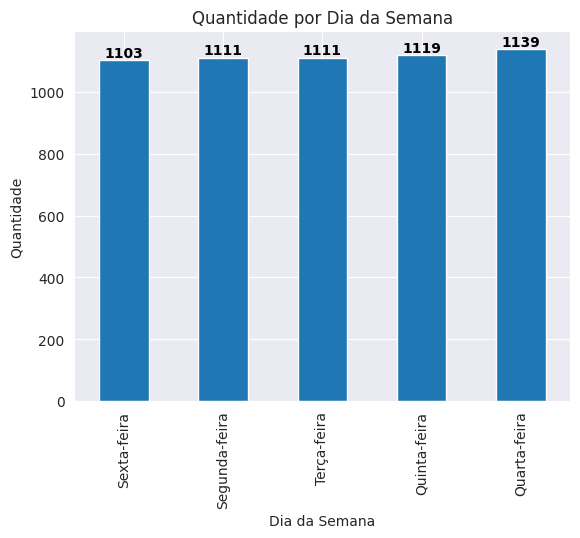

In [ ]:
# Criar o gr√°fico de barras
ax = dados_dia.plot(kind='bar')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.title('Quantidade por Dia da Semana')

# Adicionar valores como anota√ß√µes nas barras
for idx, value in enumerate(dados_dia):
    ax.text(idx, value + 10, str(value), ha='center', color='black', fontweight='bold')

plt.show()

## Avalia√ß√£o das Distribui√ß√µes

Vis√£o considerando toda s√©rie hist√≥rica (2000 a 2023)

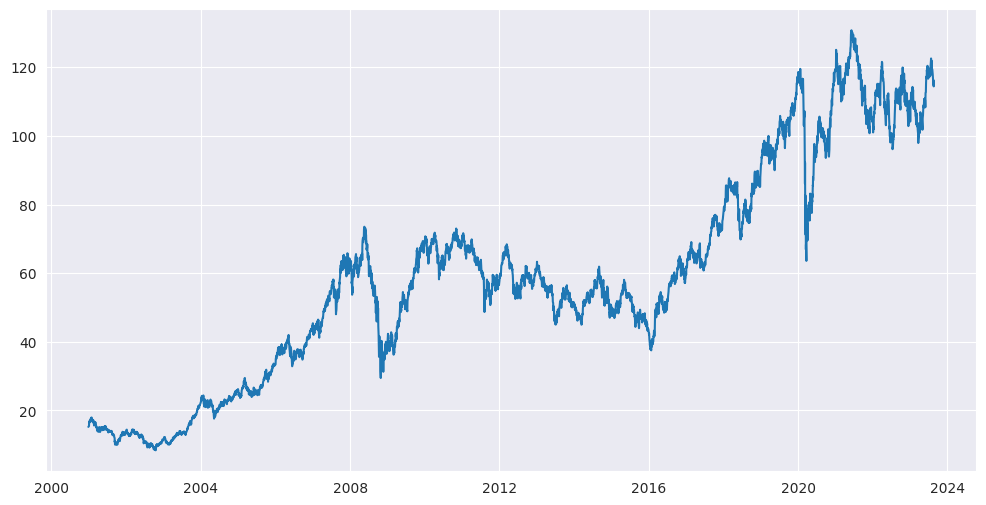

In [ ]:
sns.set_style("darkgrid")
ibovespa_diario = ibovespa_diario.sort_index()

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(ibovespa_diario.index, ibovespa_diario.√öltimo)
plt.show()

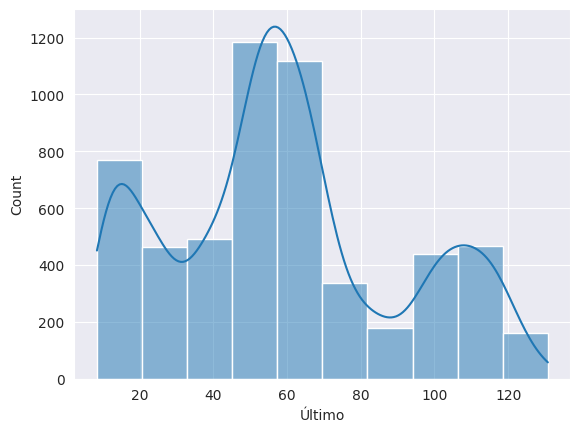

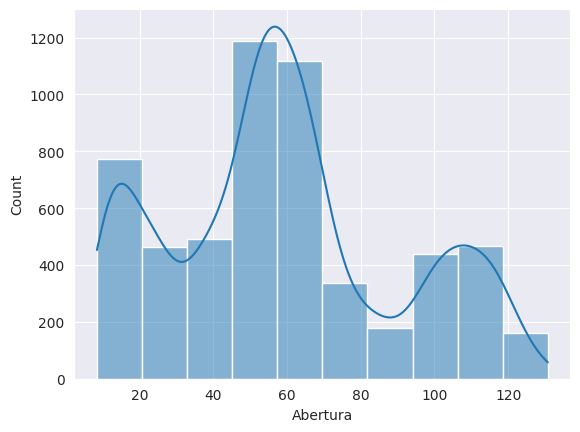

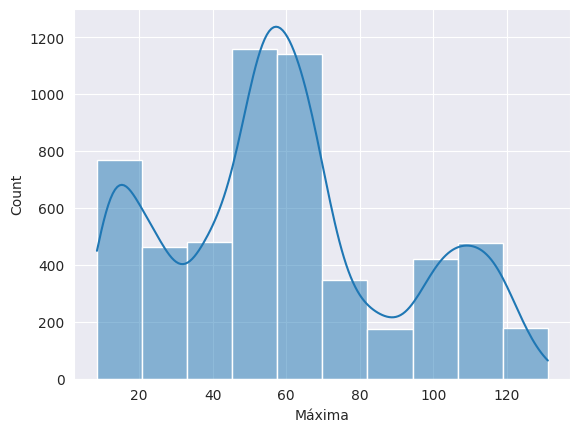

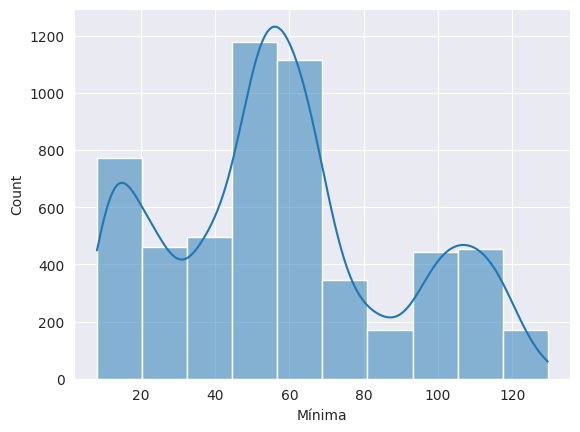

In [ ]:
colunas_numericas_preco = ["√öltimo", "Abertura", "M√°xima", "M√≠nima"]
for column in colunas_numericas_preco:
    plt.figure()
    plot = ibovespa_diario[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

Podemos ver que distribui√ßao dos dados de valores ao longo seguem um comportamento similar.

<ipython-input-437-e3f7f1958548>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

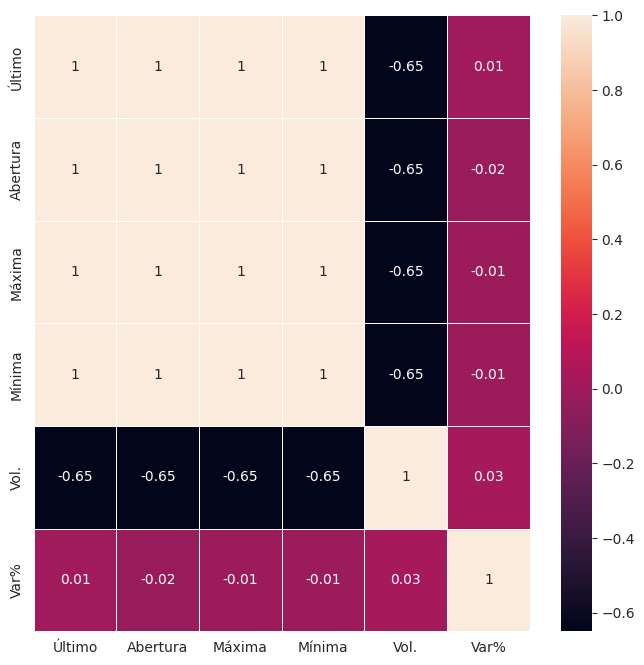

In [ ]:
correlation_matrix = ibovespa_diario.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### Distribui√ß√µes com filtro de datas a partir de 2010 (redu√ß√£o do tempo de an√°lise)

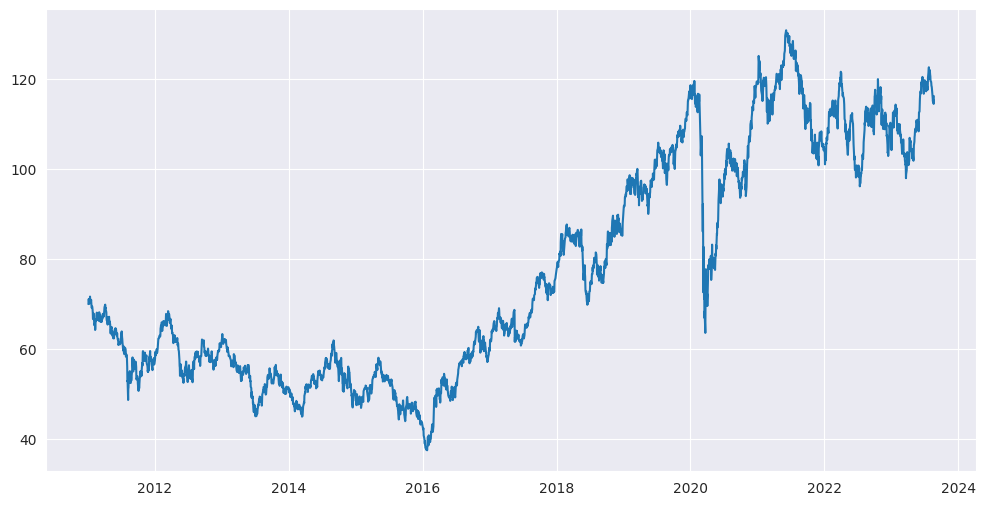

In [ ]:
ibovespa_pos_2010 = ibovespa_diario.loc[ibovespa_diario.index.year > 2010]
ibovespa_pos_2010 = ibovespa_pos_2010.sort_index()
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(ibovespa_pos_2010.index, ibovespa_pos_2010.√öltimo)
plt.show()

> Como as movimenta√ß√µes na bolsa s√£o afetadas por dados extermos, vemos uma queda acentuada logo no come√ßo de 2020, quando ocorreu a pandemia global do Coronav√≠rus.

> O mercado voltou a crescer ao longo de 2021.

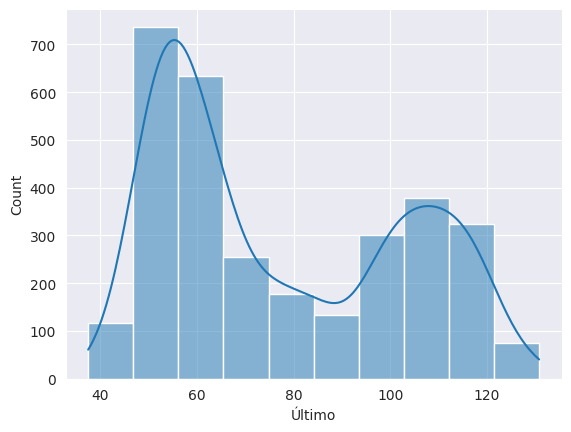

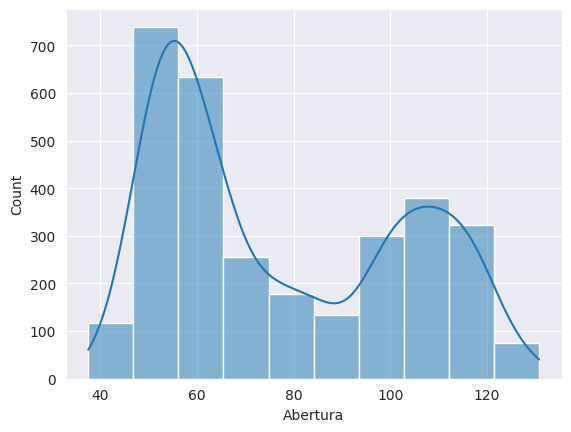

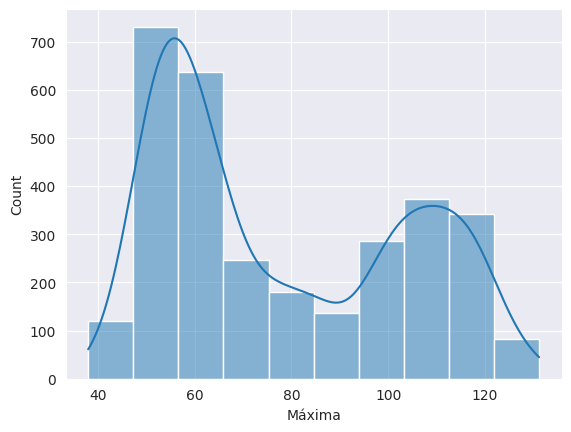

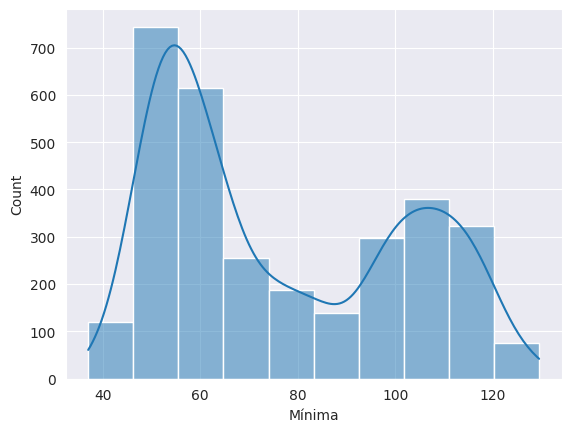

In [ ]:
colunas_numericas_preco = ["√öltimo", "Abertura", "M√°xima", "M√≠nima"]
for column in colunas_numericas_preco:
    plt.figure()
    plot = ibovespa_pos_2010[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

## An√°lises temporais - Vis√£o e an√°lises

> O **pre√ßo de fechamento** reflete o valor final pelo qual o ativo foi negociado durante o dia e √© frequentemente usado como um indicador-chave para an√°lise de s√©ries temporais.

* ds = ibovespa_diario.index
* y = ibovespa_diario["√öltimo]
* ticker = ibovespa

In [ ]:
!pip install prophet pandas_ta

In [ ]:
# importa√ß√£o de bibliotecas para modelo e an√°lise de series temporais
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation # valida√ß√£o de m√©tricas
from prophet.diagnostics import performance_metrics # valida√ß√£o de m√©tricas
import plotly.graph_objs as go
import pandas_ta as ta
import math

In [ ]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

### An√°lise do seasonal Decompose

#### Seasonal decompose a partir de 2010

In [ ]:
dados_decompose = ibovespa_pos_2010[['√öltimo']]
dados_decompose = dados_decompose.dropna()
dados_decompose = dados_decompose.sort_index()

In [ ]:
resultados = seasonal_decompose(dados_decompose, period=5)

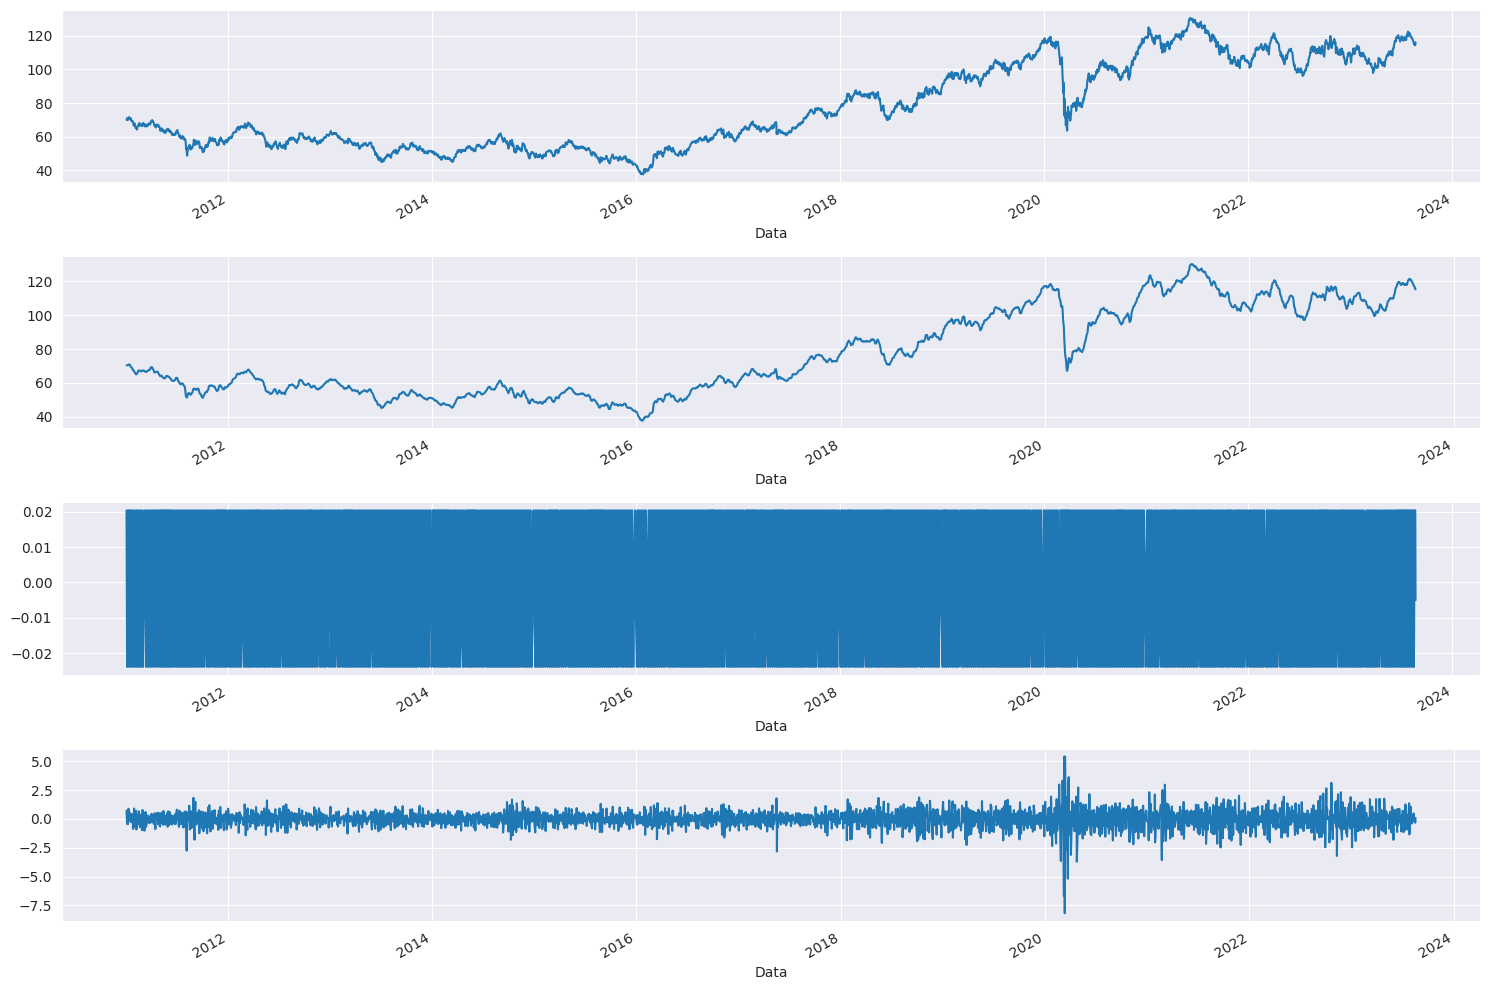

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2) # tend√™ncia dos dados ao longo do tempo
resultados.seasonal.plot(ax=ax3) # sazonalidade / recorrencia dos dados
resultados.resid.plot(ax=ax4) # residuos que n√£o necessariamente fazem sentido - IMPORTANTE AVALIAR

plt.tight_layout()
plt.show()

> **Infer√™ncias iniciais dos gr√°ficos**:

* Pelas an√°lises de obsevra√ß√£o e tend√™ncia, temos um comportamento de crescimento ao longo dos anos, indicando que h√° um aumento no volume das cota√ß√µes em rela√ß√£o √† cota√ß√£o no momento do fechamento.

* Vemos tamb√©m que a concentra√ß√£o de res√≠duo fica maior no final do per√≠odo analisado


* Analisando os dados de sazonalidade desde 2010, n√£o √© poss√≠vel avaliar se h√° uma sazonalidade no comportamento dos dados. Vamos reduzir o tempo para ter uma avalia√ß√£o melhor da situa√ß√£o.

#### Seasonal decompose a partir de 2022

In [ ]:
dados_decompose_2 = ibovespa_pos_2010.loc[ibovespa_pos_2010.index.year > 2021]
dados_decompose_2 = dados_decompose_2[['√öltimo']]
dados_decompose_2 = dados_decompose_2.dropna()
dados_decompose_2 = dados_decompose_2.sort_index()


resultados_2 = seasonal_decompose(dados_decompose_2, period=5)

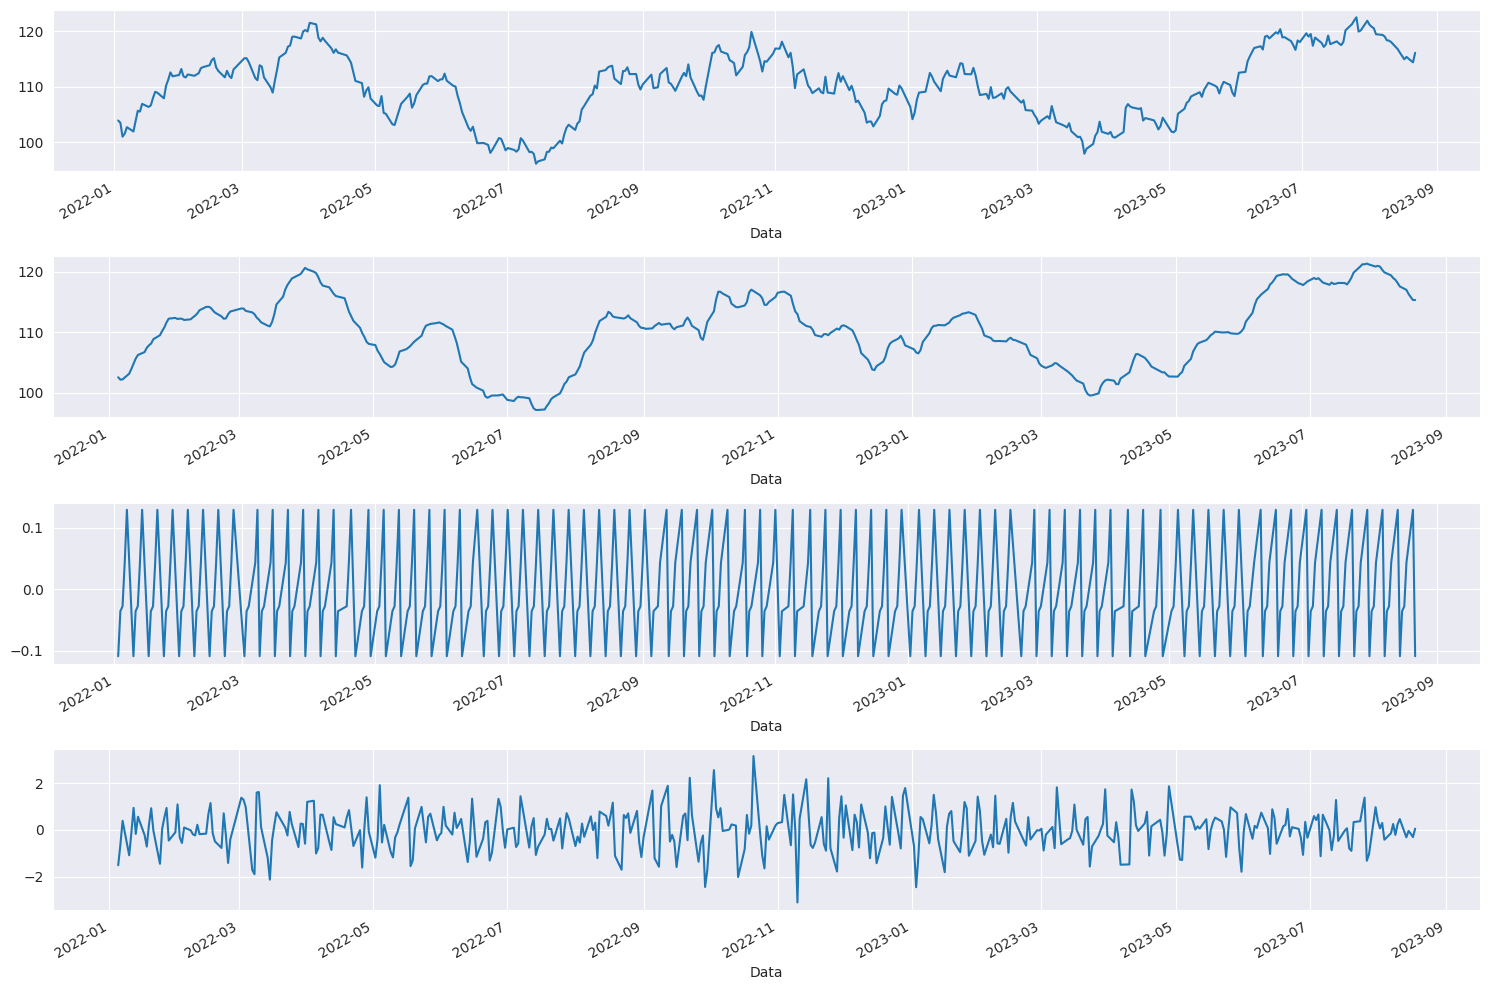

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,10))

resultados_2.observed.plot(ax=ax1)
resultados_2.trend.plot(ax=ax2) # tend√™ncia dos dados ao longo do tempo
resultados_2.seasonal.plot(ax=ax3) # sazonalidade / recorrencia dos dados
resultados_2.resid.plot(ax=ax4) # residuos que n√£o necessariamente fazem sentido - IMPORTANTE AVALIAR

plt.tight_layout()
plt.show()

> **Infer√™ncias p√≥s-redu√ß√£o do tempo de an√°lise**:

* Reduzindo o tempo de an√°lises, vemos que n√£o h√° uma tend√™ncia muito bem definida nos dados, que oscila ao longo do tempo.

* O res√≠dio tamb√©m aparenta uma const√¢ncia, ap√≥s um aumento ao final de 2022.

* Podemos tamb√©m inferir inicialmente que esses dados **n√£o s√£o estacion√°rios,**, com base na tend√™ncia do gr√°fico 2 da tabela acima.

### An√°lise do AdFuller

    H0 -> S√©rie n√£o estacion√°ria (p-value > 0.05)
    H1 -> S√©rie estacion√°ria (p-value <= 0.05)

#### AdFuller considerando base p√≥s 2010 - N√ÉO ESTACION√ÅRIA (p-value = 0.77)

In [ ]:
X_2011 = dados_decompose.√öltimo.values  # transforma√ß√£o dos dados em vari√°vel

# configura√ß√£o do teste
result_2011 = adfuller(X_2011)

alpha = 0.05

# print das m√©tricas do teste
print("Teste ADF - Dados p√≥s 2011")
print(f"Teste Estat√≠stico: {result_2011[0]}")
print(f"P-Value: {result_2011[1]}")
print("Valores cr√≠ticos:")

for key, value in result_2011[4].items():
  print(f"\t{key}: {value}")


print("Avalia√ß√£o do p-value")
if result_2011[1] >= alpha:
  print(f"\tEstatisticamente, n√£o podemos rejeitar a hip√≥tese nula - S√©rie N√£o Estacion√°ria")
else:
  print(f"\tRejeitar a hip√≥tese nula - S√©rie Estacion√°ria.")


Teste ADF - Dados p√≥s 2011
Teste Estat√≠stico: -0.9294690848934833
P-Value: 0.7781130066362649
Valores cr√≠ticos:
	1%: -3.4324449684310445
	5%: -2.8624656272139637
	10%: -2.5672627334083655
Avalia√ß√£o do p-value
	Estatisticamente, n√£o podemos rejeitar a hip√≥tese nula - S√©rie N√£o Estacion√°ria


#### AdFuller considerando base p√≥s 2022 - N√ÉO ESTACION√ÅRIA (p-value = 0.10)

In [ ]:
X_2022 = dados_decompose_2.√öltimo.values  # transforma√ß√£o dos dados em vari√°vel

# configura√ß√£o do teste
result_2022 = adfuller(X_2022)

alpha = 0.05

# print das m√©tricas do teste
print("Teste ADF - Dados p√≥s 2022")
print(f"Teste Estat√≠stico: {result_2022[0]}")
print(f"P-Value: {result_2022[1]}")
print("Valores cr√≠ticos:")

for key, value in result_2022[4].items():
  print(f"\t{key}: {value}")


print("Avalia√ß√£o do p-value")
if result_2022[1] >= alpha:
  print(f"\tEstatisticamente, n√£o podemos rejeitar a hip√≥tese nula - S√©rie N√£o Estacion√°ria")
else:
  print(f"\tRejeitar a hip√≥tese nula - S√©rie Estacion√°ria.")

Teste ADF - Dados p√≥s 2022
Teste Estat√≠stico: -2.5312262750606433
P-Value: 0.10806029484343327
Valores cr√≠ticos:
	1%: -3.4464400156784927
	5%: -2.868632644097719
	10%: -2.5705481612974577
Avalia√ß√£o do p-value
	Estatisticamente, n√£o podemos rejeitar a hip√≥tese nula - S√©rie N√£o Estacion√°ria


# Cria√ß√£o dos modelos

## Constru√ß√£o dos modelos com Prophet

### 1Ô∏è‚É£ An√°lise 1: Modelo sem separa√ß√£o de bases de treino / teste (Dados entre Jan/2022 a Agosto/2023)

In [ ]:
# configura√ß√£o do df para modelo (usando todos os dados a partir de 2022 e sem separa√ß√£o de bases entre treino e valida√ß√£o)
dados_modelo = dados_decompose_2.reset_index()
dados_modelo = dados_modelo.rename(columns={"Data": "ds", "√öltimo": "y"})
dados_modelo.ta.ema(close='y', length=21, append=True) # adicionado o c√°lculo da m√©dia movel exponencial, considerando 21 dias (aplica mais peso aos dados mais atuais).
dados_modelo.dropna(inplace=True)
dados_modelo.head()

ds        y      EMA_21
20 2022-01-31  112.144  106.751667
21 2022-02-01  113.228  107.340424
22 2022-02-02  111.894  107.754386
23 2022-02-03  111.696  108.112714
24 2022-02-04  112.245  108.488377

In [ ]:
dados_modelo.shape

(391, 3)

In [ ]:
# configura√ß√£o do modelo e fit dos dados de treino
model = Prophet(daily_seasonality=True)
model.fit(dados_modelo)

future = model.make_future_dataframe(periods=30) # valida√ß√£o para 30D posteriores
forecast = model.predict(future) #

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx92d36nj/9wd5cy0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx92d36nj/_ou47ypp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96929', 'data', 'file=/tmp/tmpx92d36nj/9wd5cy0t.json', 'init=/tmp/tmpx92d36nj/_ou47ypp.json', 'output', 'file=/tmp/tmpx92d36nj/prophet_model38onj64b/prophet_model-20230829203429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:34:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:34:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model,forecast)

> A linha indica uma previs√£o que, aparentemente, acompanha a tend√™ncia dos de movimenta√ß√£o os dados atuais.

> Por√©m, √© poss√≠vel perceber que h√° um volume consider√°vel de outliers dentro desta vis√£o (pontos pretos fora dos intervalos de confian√ßa).

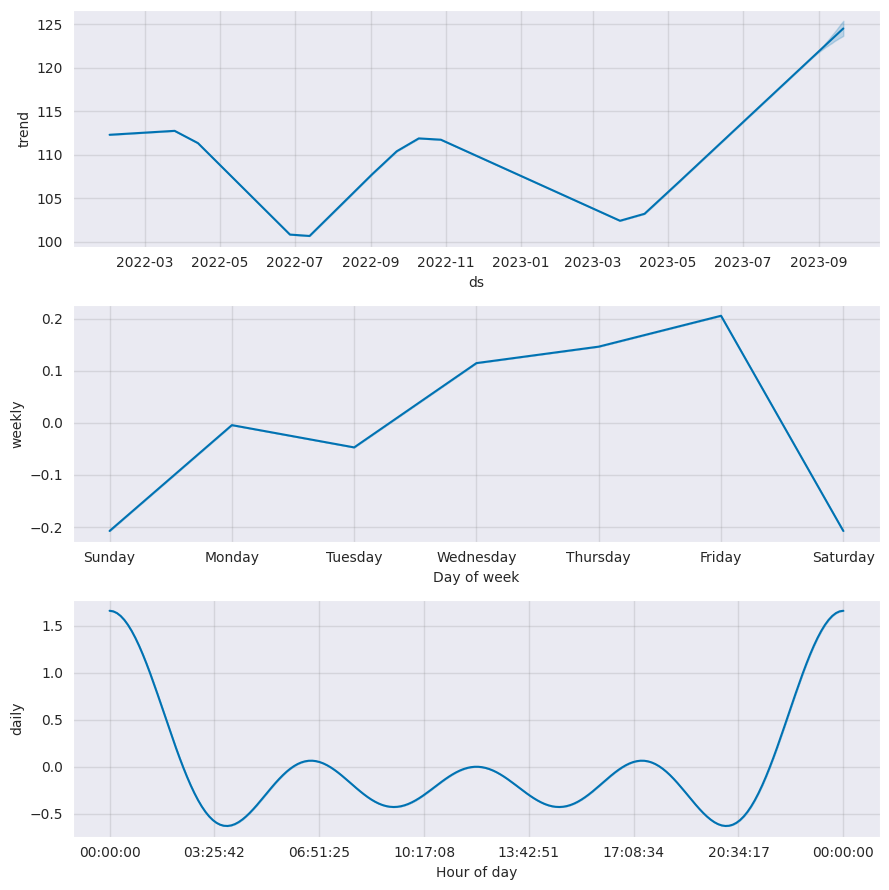

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
fig = go.Figure([
    go.Scatter(x=dados_modelo['ds'], y=dados_modelo['y'], name='Actual', mode='lines'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted', mode='lines'),
    go.Scatter(x=forecast['ds'], y=dados_modelo['EMA_21'], name='EMA', mode='lines')
])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Para uma vis√£o melhor, h√° uma vis√£o acima unindo as previs√µes, os dados reais e a m√©dia m√≥vel exponencial dos √∫ltimos 21 dias.

* A predi√ß√£o, apesar de seguir uma sazonalidade similar, tem diferen√ßas em rela√ß√£o ao mvoimento e intensidade dos dados.

* Nos √∫ltimos dias, vemos que os dados preditos seguem em um movimento crescente enquanto tanto a predi√ß√£o quando os dados m√≥veis apresentam comportamento de queda

In [ ]:
# Acessar predi√ß√µes do modelo
pred_df = forecast[forecast['ds'] > '2023-08-22'][['ds','yhat']]

# ajustar dataframe
pred_df.reset_index(inplace=True)
pred_df.drop(labels='index', axis=1,inplace=True)
pred_df.rename(columns={'ds': 'ds', 'yhat': 'y_pred'}, inplace=True)
pred_df.head()

ds      y_pred
0 2023-08-23  122.470011
1 2023-08-24  122.633327
2 2023-08-25  122.824302
3 2023-08-26  122.543335
4 2023-08-27  122.675087

### üìä An√°lise 1: Relat√≥rio com m√©tricas de performance

In [ ]:
uniao_dados = forecast.set_index('ds')[['yhat']].join(dados_modelo.set_index('ds').y).reset_index().dropna()

wmape_forecast_v1 = wmape(uniao_dados['y'].values, uniao_dados['yhat'].values)
print(f'WMape V1: {wmape_forecast_v1:.2%}')

mse_forecast_v1 = mean_squared_error(uniao_dados['y'].values, uniao_dados['yhat'].values)
print(f'MSE V1: {mse_forecast_v1:.2%}')

mae_forecast_v1 = mean_absolute_error(uniao_dados['y'].values, uniao_dados['yhat'].values)
print(f'MAE V1: {mae_forecast_v1:.2%}')

rmse_forecast_v1 = math.sqrt(mean_absolute_error(uniao_dados['y'].values, uniao_dados['yhat'].values))
print(f'RMSE V1: {rmse_forecast_v1:.2%}')

WMape: 2.53%
MSE: 1117.18%
MAE: 278.68%
RMSE: 166.94%


**Infer√™ncias Modelo 1:**

> Apesar do WMape relativamente baixo, as outras margens de erro MSE, MAE e RMSE indicam uma grande dispers√£o entre os dados previstos e os reais.

#### Valida√ß√£o Cruzada

In [ ]:
# execute cross validation
df_cv = cross_validation(model, initial='421 days', period='7 days', horizon = '30 days')

# measure performance
df_p = performance_metrics(df_cv)

In [ ]:
print(df_cv.tail()) # visualize data
print(df_p) # measure performance

            ds        yhat  yhat_lower  yhat_upper        y     cutoff
356 2023-08-16  125.077603  121.249375  129.209482  115.592 2023-07-23
357 2023-08-17  125.338284  121.147833  129.500089  114.982 2023-07-23
358 2023-08-18  125.536786  121.377373  129.626845  115.409 2023-07-23
359 2023-08-21  125.860017  121.459114  129.971465  114.429 2023-07-23
360 2023-08-22  125.979798  122.107982  130.311542  116.156 2023-07-23
   horizon         mse       rmse       mae      mape     mdape     smape  \
0   3 days   25.735974   5.073064  4.083905  0.036258  0.037542  0.037241   
1   4 days   26.273968   5.125814  4.040158  0.035862  0.023834  0.036847   
2   5 days   30.858063   5.555003  4.486845  0.039756  0.029862  0.040941   
3   8 days   36.929710   6.076982  4.952291  0.043798  0.043574  0.045252   
4   9 days   38.148313   6.176432  5.011053  0.044354  0.044248  0.045869   
5  10 days   38.520398   6.206480  4.967706  0.043840  0.040115  0.045346   
6  11 days   38.777647   6.227170  

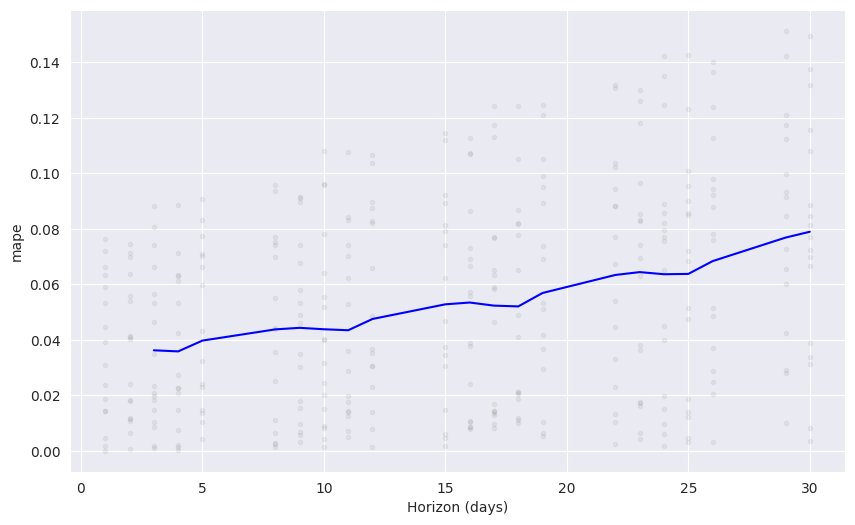

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

### 2Ô∏è‚É£ An√°lise 2: Modelo com separa√ß√£o das bases de treino vs teste (Dados entre Jan/2022 a Agosto/2023)

In [ ]:
print(dados_modelo["ds"].min())
print(dados_modelo["ds"].max())

2022-01-31 00:00:00
2023-08-22 00:00:00


In [ ]:
periodo_base = int(len(dados_modelo) * 0.2) # determinando o per√≠odo
print("Per√≠odo (20% dos dados):", periodo_base)
train, validation = dados_modelo.iloc[:-periodo_base], dados_modelo.iloc[-periodo_base:]

Per√≠odo (20% dos dados): 78


In [ ]:
print("Dados base treino:")
print(train["ds"].min())
print(train["ds"].max())
print(len(train))

print("Dados base valid:")
print(validation["ds"].min())
print(validation["ds"].max())
print(len(validation))

Dados base treino:
2022-01-31 00:00:00
2023-05-03 00:00:00
313
Dados base valid:
2023-05-04 00:00:00
2023-08-22 00:00:00
78


In [ ]:
#fit do modelo
model = Prophet()
model.fit(train)

#predi√ß√µes
future = model.make_future_dataframe(periods=(len(validation)+1), freq='d')
validation_week = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[validation_week]
forecast = model.predict(future)
forecast_valid = forecast['yhat'][-periodo:]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx92d36nj/a90tmlzh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx92d36nj/3tbpyjyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99777', 'data', 'file=/tmp/tmpx92d36nj/a90tmlzh.json', 'init=/tmp/tmpx92d36nj/3tbpyjyi.json', 'output', 'file=/tmp/tmpx92d36nj/prophet_modelfow59iau/prophet_model-20230829211819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(model,forecast)

> A partir da separa√ß√£o dos dados, vemos uma ted√™ncia um pouco mais alinhada com os dados atuais do que o modelo anteior (sem separa√ß√£o das bases).

> Mas analisando o gr√°fico abaixo, vemos que a predi√ß√£o est√° em uma dire√ß√£o constr√°ria aos dados reais.

<ipython-input-528-777bc19d27c4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-528-777bc19d27c4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



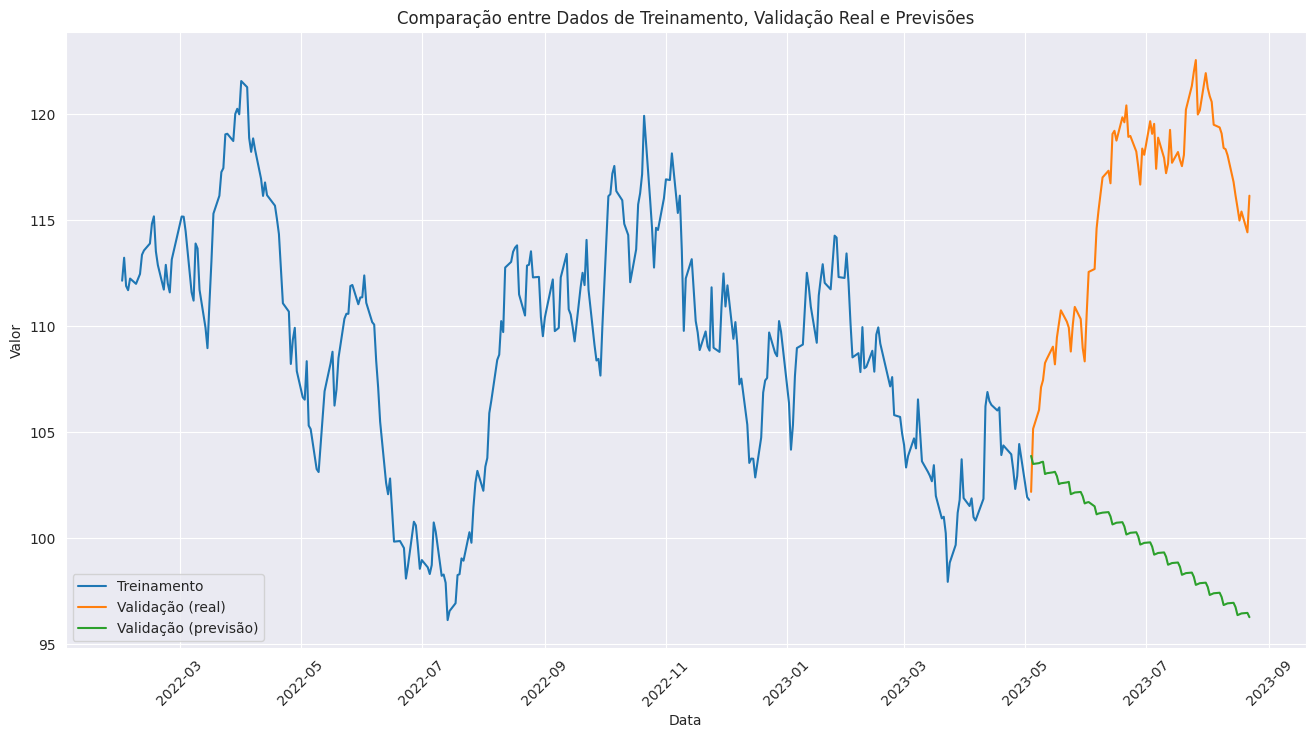

In [ ]:
validation['yhat'] = 0
validation['yhat'] = forecast_valid.values


plt.figure(figsize=(16, 8))
plt.plot(train['ds'], train['y'], label='Treinamento')  # Usando "ds" no eixo x para o treinamento
plt.plot(validation['ds'], validation['y'], label='Valida√ß√£o (real)')  # Usando "ds" no eixo x para a valida√ß√£o real
plt.plot(validation['ds'], validation['yhat'], label='Valida√ß√£o (previs√£o)')  # Usando "ds" no eixo x para as previs√µes
plt.legend()
plt.xticks(rotation=45)  # Rotaciona os r√≥tulos do eixo x para melhorar a legibilidade
plt.xlabel('Data')  # Adiciona r√≥tulo ao eixo x
plt.ylabel('Valor')  # Adiciona r√≥tulo ao eixo y
plt.title('Compara√ß√£o entre Dados de Treinamento, Valida√ß√£o Real e Previs√µes')
plt.show()

Na an√°lise dos componentes abaixo, vemos que o tamanho das bandas de intervalo s√£o bem grandes, demonstrando um n√≠vel de erro mais acentuado.

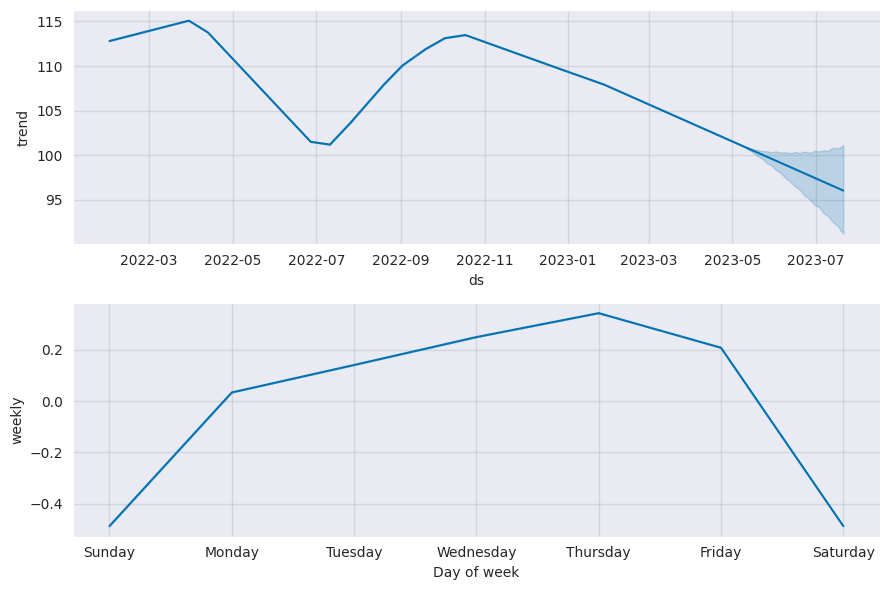

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
# train = train[['ds','y']]
# dados_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
# df = pd.merge(train, dados_forecast, on='ds', how='right')
# df.set_index('ds').plot(figsize=(16,8), title= 'Fechamento dados',color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

### üìä An√°lise 2: Relat√≥rio com m√©tricas de performance

In [ ]:
validacao_2 = forecast.set_index('ds')[['yhat']].join(validation.set_index('ds').y).reset_index().dropna()

wmape_forecast_v2 = wmape(validacao_2['y'].values, validacao_2['yhat'].values)
print(f'WMape V2: {wmape_forecast_v2:.2%}')

mse_forecast_v2 = mean_squared_error(validacao_2['y'].values, validacao_2['yhat'].values)
print(f'MSE V2: {mse_forecast_v2:.2%}')

mae_forecast_v2 = mean_absolute_error(validacao_2['y'].values, validacao_2['yhat'].values)
print(f'MAE V2: {mae_forecast_v2:.2%}')

rmse_forecast_v2 = math.sqrt(mean_absolute_error(validacao_2['y'].values, validacao_2['yhat'].values))
print(f'RMSE V2: {rmse_forecast_v2:.2%}')

WMape: 13.60%
MSE: 28221.55%
MAE: 1555.75%
RMSE: 394.43%


**Infer√™ncias Modelo 2:**

* Temos um WMape de 13%, maior do que o modelo anterior, j√° indicando uma acur√°cia menor.
* Todos as outras m√©tricas de erro tamb√©m aumentaram entre um teste e outro.
* No modelo, excluimos datas de final da semana (s√°bado e domingo) da precis√£o futura, entretanto ao rodar o c√≥digo sem essa valida√ß√£o os valores de erro aumentam.

### 3Ô∏è‚É£ An√°lise 3: Modelo com separa√ß√£o das bases de treino vs teste (30 √∫ltimos dias de dado - 12/07 a 22/08/23)

In [ ]:
# Separa√ß√£o das bases entre treino e valida√ß√£o
periodo_base = int(len(dados_30D) * 0.2)
train, validation = dados_30D.iloc[:-periodo_base], dados_30D.iloc[-periodo_base:]

print("Dados base treino:")
print(train["ds"].min())
print(train["ds"].max())
print("Tamanho base treino:", len(train))

print("Dados base valid:")
print(validation["ds"].min())
print(validation["ds"].max())
print("Tamanho base valid:",len(validation))

Dados base treino:
2023-07-12 00:00:00
2023-08-14 00:00:00
Tamanho base treino: 24
Dados base valid:
2023-08-15 00:00:00
2023-08-22 00:00:00
Tamanho base valid: 6


In [ ]:
#fit do modelo
model = Prophet()
model.fit(train)

#predi√ß√µes
future = model.make_future_dataframe(periods=(len(validation)+1), freq='d')
validation_week = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[validation_week]
forecast = model.predict(future)
forecast_valid = forecast['yhat'][-periodo_base:]

<ipython-input-574-777bc19d27c4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-574-777bc19d27c4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



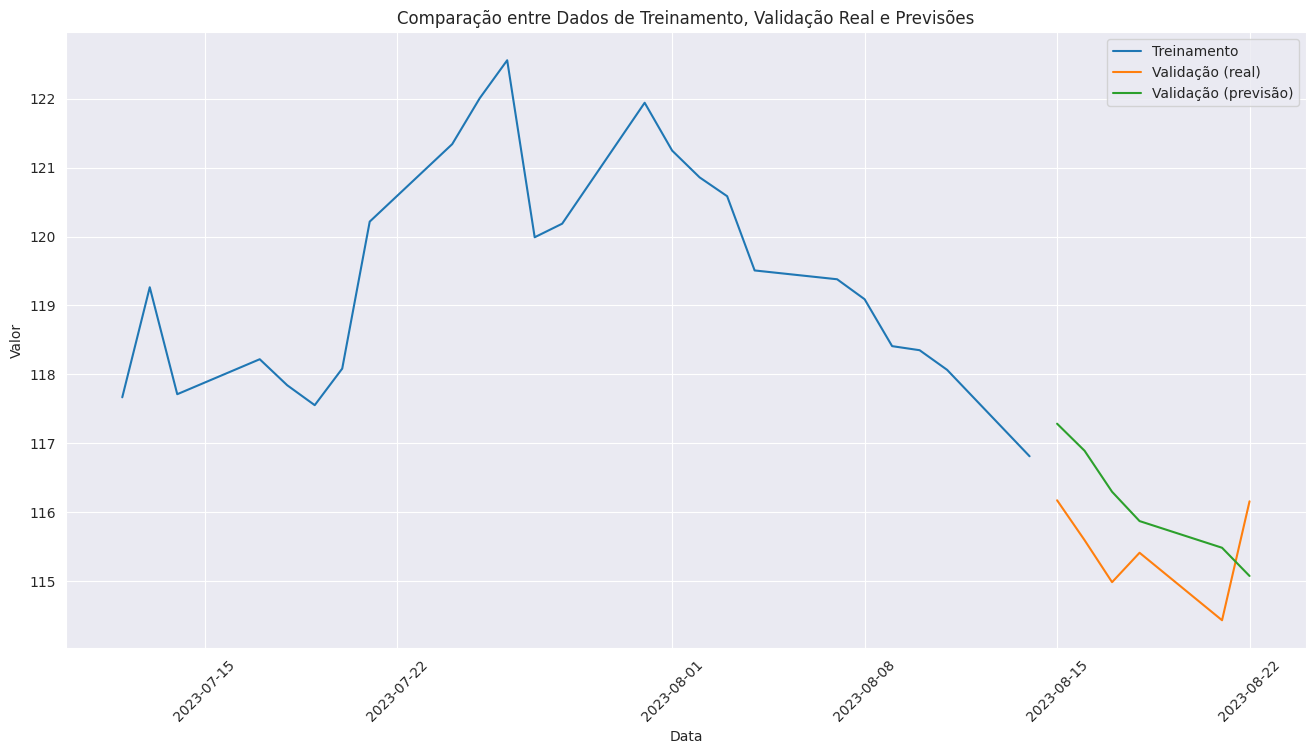

In [ ]:
validation['yhat'] = 0
validation['yhat'] = forecast_valid.values


plt.figure(figsize=(16, 8))
plt.plot(train['ds'], train['y'], label='Treinamento')  # Usando "ds" no eixo x para o treinamento
plt.plot(validation['ds'], validation['y'], label='Valida√ß√£o (real)')  # Usando "ds" no eixo x para a valida√ß√£o real
plt.plot(validation['ds'], validation['yhat'], label='Valida√ß√£o (previs√£o)')  # Usando "ds" no eixo x para as previs√µes
plt.legend()
plt.xticks(rotation=45)  # Rotaciona os r√≥tulos do eixo x para melhorar a legibilidade
plt.xlabel('Data')  # Adiciona r√≥tulo ao eixo x
plt.ylabel('Valor')  # Adiciona r√≥tulo ao eixo y
plt.title('Compara√ß√£o entre Dados de Treinamento, Valida√ß√£o Real e Previs√µes')
plt.show()

In [ ]:
plot_plotly(model,forecast)

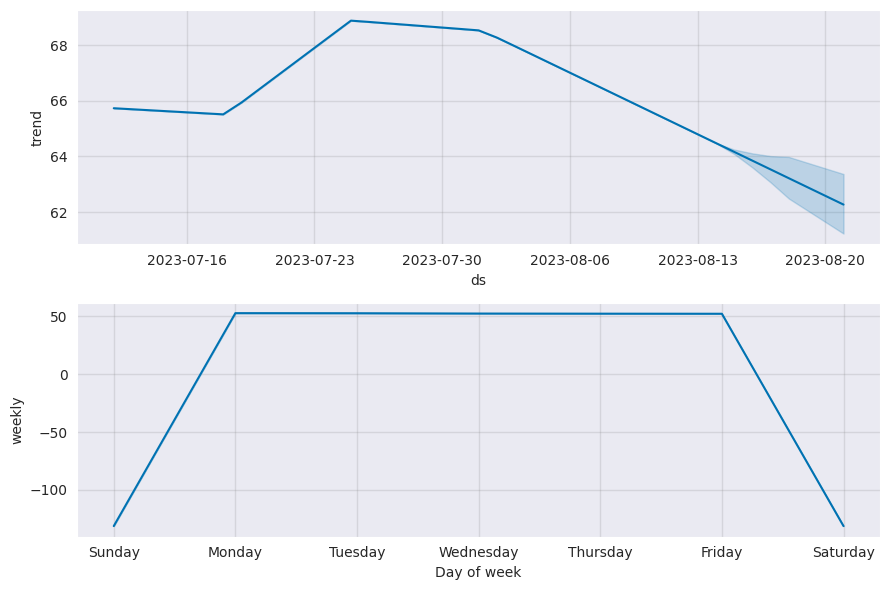

In [ ]:
model.plot_components(forecast)
plt.show()

#### Modelo V1 (n√£o ser√° usado)

In [ ]:
# # Treinamento do modelo
# model = Prophet()
# model.fit(train)


# future = model.make_future_dataframe(periods=30) # valida√ß√£o para 6D posteriores
# forecast = model.predict(future) #

# # Previs√£o do conjunto de teste
# forecast_valid = model.predict(validation)

In [ ]:
# # Plotagem dos dados
# plt.plot(train["ds"], train["y"], label="Dados de treino")
# plt.plot(validation["ds"], validation["y"], label="Dados de teste")
# plt.plot(forecast_valid["ds"], forecast_valid["yhat"], label="Previs√£o")
# plt.fill_between(forecast_valid["ds"], forecast_valid["yhat_lower"], forecast_valid["yhat_upper"], color="gray", alpha=0.2)
# plt.title("Previs√£o com Prophet")
# plt.xticks(rotation=45)  # Rotaciona os r√≥tulos do eixo x para melhorar a legibilidade
# plt.legend()
# plt.show()

In [ ]:
# # Avalia√ß√£o das previs√µes - Modelo 1

# wmape_forecast_v3 = wmape(validation["y"].values, forecast_valid["yhat"].values)
# print(f'WMape: {wmape_forecast_v3:.2%}')

# mse_forecast_v3 = mean_squared_error(validation["y"].values, forecast_valid["yhat"].values)
# print(f'MSE: {mse_forecast_v3:.2%}')

# mae_forecast_v3 = mean_absolute_error(validation["y"].values, forecast_valid["yhat"].values)
# print(f'MAE: {mae_forecast_v3:.2%}')

# rmse_forecast_v3 = math.sqrt(mean_absolute_error(validation["y"].values, forecast_valid["yhat"].values))
# print(f'RMSE: {rmse_forecast_v3:.2%}')

WMape: 0.65%
MSE: 73.30%
MAE: 75.02%
RMSE: 86.61%


### üìä An√°lise 3: Relat√≥rios de Performance

In [ ]:
# Avalia√ß√£o das previs√µes

validacao_3 = forecast.set_index('ds')[['yhat']].join(validation.set_index('ds').y).reset_index().dropna()

wmape_forecast_v3 = wmape(validacao_3['y'].values, validacao_3['yhat'].values)
print(f'WMape: {wmape_forecast_v3:.2%}')

mse_forecast_v3 = mean_squared_error(validacao_3['y'].values, validacao_3['yhat'].values)
print(f'MSE: {mse_forecast_v3:.2%}')

mae_forecast_v3 = mean_absolute_error(validacao_3['y'].values, validacao_3['yhat'].values)
print(f'MAE: {mae_forecast_v3:.2%}')

rmse_forecast_v3 = math.sqrt(mean_absolute_error(validacao_3['y'].values, validacao_3['yhat'].values))
print(f'RMSE: {rmse_forecast_v3:.2%}')

WMape: 0.52%
MSE: 44.32%
MAE: 60.49%
RMSE: 77.77%


#### Cross Validation

In [ ]:
# Defini√ß√£o dos parametros para o cross validation com o tamanho das bases de treino e teste
# period: comprimento da sazonalidade (di√°ria)
print("Initial:",len(train)) # ponto inicial do modelo
print("Horizon:",len(validation)) #  per√≠odo de previs√£o


Initial: 24
Horizon: 6


In [ ]:
results = cross_validation(model, initial="24 days", period='1 days', horizon = '6 days') # execute cross validation
metrics = performance_metrics(results) # mensura√ß√£o da performance

In [ ]:
print(metrics)
print(results.tail())

  horizon       mse      rmse       mae      mape     mdape     smape  \
0  1 days  0.770658  0.877871  0.664111  0.005569  0.002867  0.005543   
1  2 days  1.052804  1.026062  0.878600  0.007379  0.007521  0.007343   
2  3 days  1.159855  1.076966  0.849355  0.007159  0.007120  0.007121   
3  4 days  1.542421  1.241943  1.017513  0.008595  0.011631  0.008541   
4  5 days  1.969396  1.403352  1.403100  0.011870  0.011870  0.011800   
5  6 days  1.313070  1.145892  1.096332  0.009321  0.009321  0.009273   

   coverage  
0  0.666667  
1  0.500000  
2  0.500000  
3  0.333333  
4  0.000000  
5  0.500000  
           ds        yhat  yhat_lower  yhat_upper        y     cutoff
13 2023-08-11  118.041830  117.128441  119.121105  118.065 2023-08-07
14 2023-08-09  118.589223  117.729207  119.445408  118.409 2023-08-08
15 2023-08-10  118.095055  117.108924  119.039524  118.350 2023-08-08
16 2023-08-11  117.704581  116.512160  118.779484  118.065 2023-08-08
17 2023-08-14  117.572978  116.107476  1

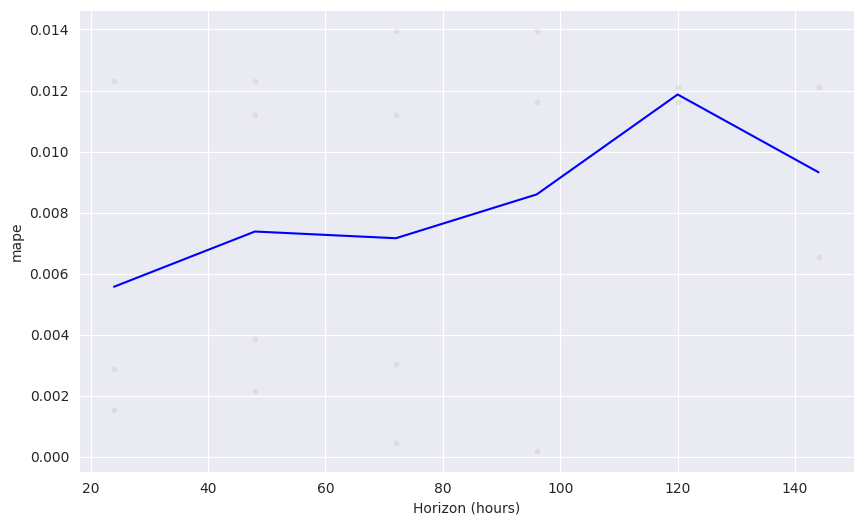

In [ ]:
fig = plot_cross_validation_metric(results, metric='mape')

### 4Ô∏è‚É£ An√°lise 4: Modelo com separa√ß√£o de bases dos √∫ltimos 30 com ajustes nos hiperpar√¢metros

In [ ]:
dados_decompose = dados_30D.set_index('ds')
dados_decompose = dados_decompose["y"]
dados_decompose.sort_index(inplace=True)

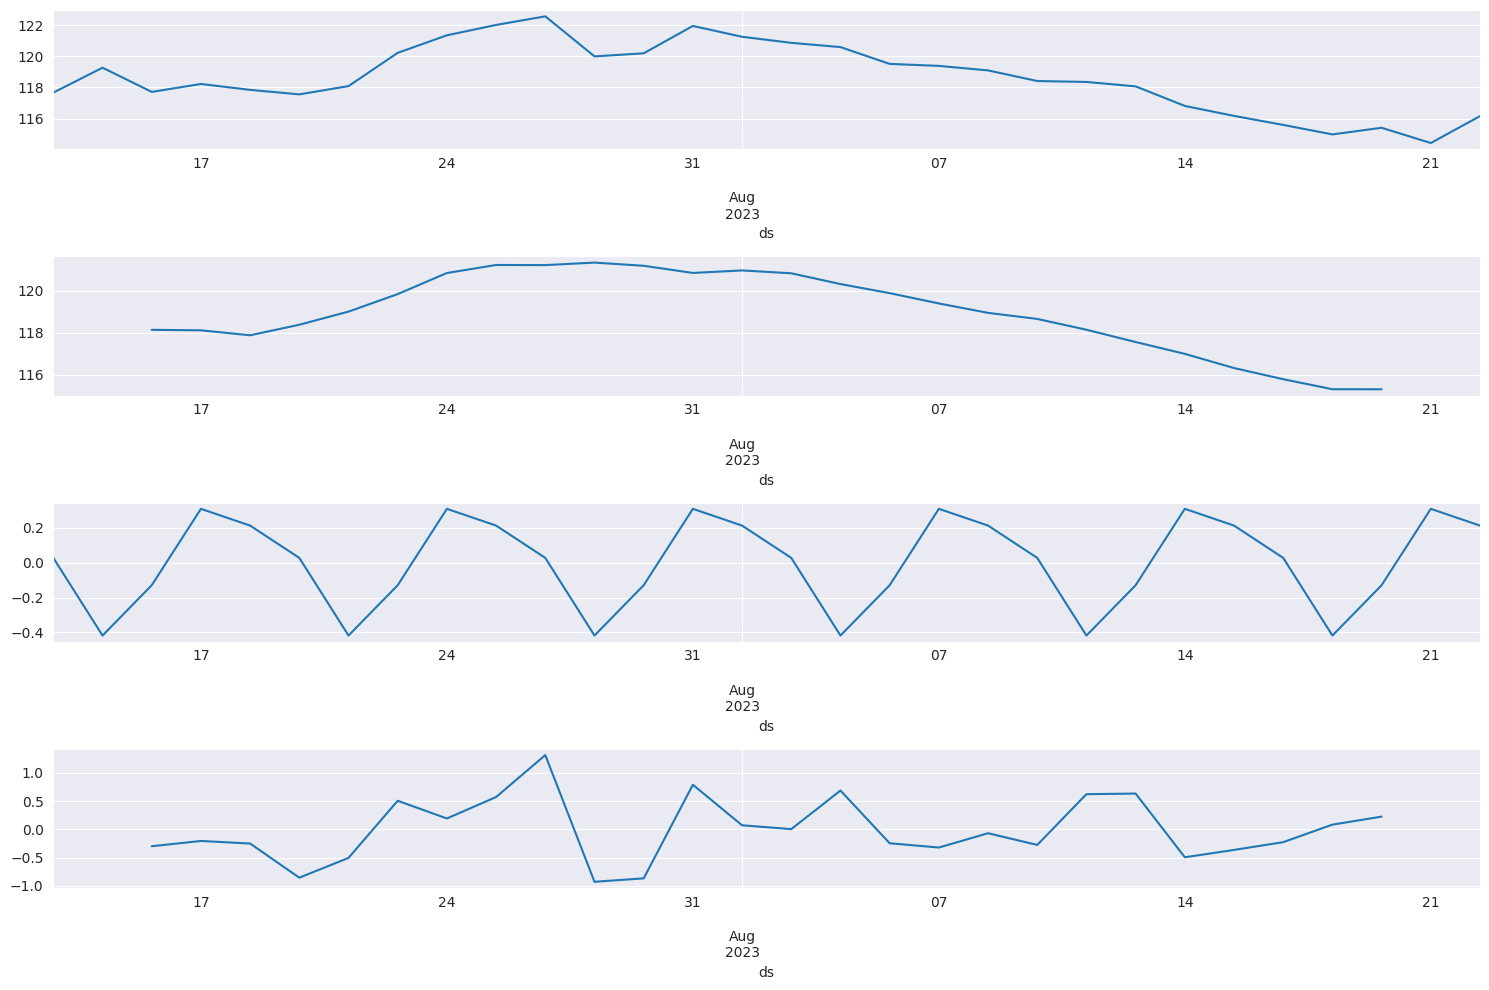

In [ ]:
resultados_30d = seasonal_decompose(dados_decompose)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,10))

resultados_30d.observed.plot(ax=ax1)
resultados_30d.trend.plot(ax=ax2) # tend√™ncia dos dados ao longo do tempo
resultados_30d.seasonal.plot(ax=ax3) # sazonalidade / recorrencia dos dados
resultados_30d.resid.plot(ax=ax4) # residuos que n√£o necessariamente fazem sentido - IMPORTANTE AVALIAR

plt.tight_layout()
plt.show()

** Inclus√£o de Hiperpar√¢metros no modelo Prophet**:

* seasonality_mode: se refere aos componentes de sazonalidade - "additive" ou "multiplicative"
> Vamos usar o Multiplicativo ao inv√©s de "aditivo", para aumentar a import√¢ncia das sazonalidades ao longo do tempo.

* growth: Crescimento da tend√™ncia - "linear" ou "logistic"

In [ ]:
# Separa√ß√£o das bases entre treino e valida√ß√£o
dados_30D.sort_index()
periodo_base = int(len(dados_30D) * 0.2)
train, validation = dados_30D.iloc[:-periodo_base], dados_30D.iloc[-periodo_base:]


#fit do modelo
model_adj = Prophet(seasonality_mode="multiplicative", growth="linear") # ajuste de hiperametros
model_adj.fit(train)

#predi√ß√µes
future = model_adj.make_future_dataframe(periods=(len(validation)+1), freq='d')
validation_week = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[validation_week]
forecast_adj = model_adj.predict(future)
forecast_valid_adj = forecast_adj['yhat'][-periodo_base:]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx92d36nj/gvxa7rvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx92d36nj/86hdv68w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41753', 'data', 'file=/tmp/tmpx92d36nj/gvxa7rvf.json', 'init=/tmp/tmpx92d36nj/86hdv68w.json', 'output', 'file=/tmp/tmpx92d36nj/prophet_model0qlgg4po/prophet_model-20230829220231.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:02:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:

<ipython-input-628-c0bf46a3da44>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-628-c0bf46a3da44>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



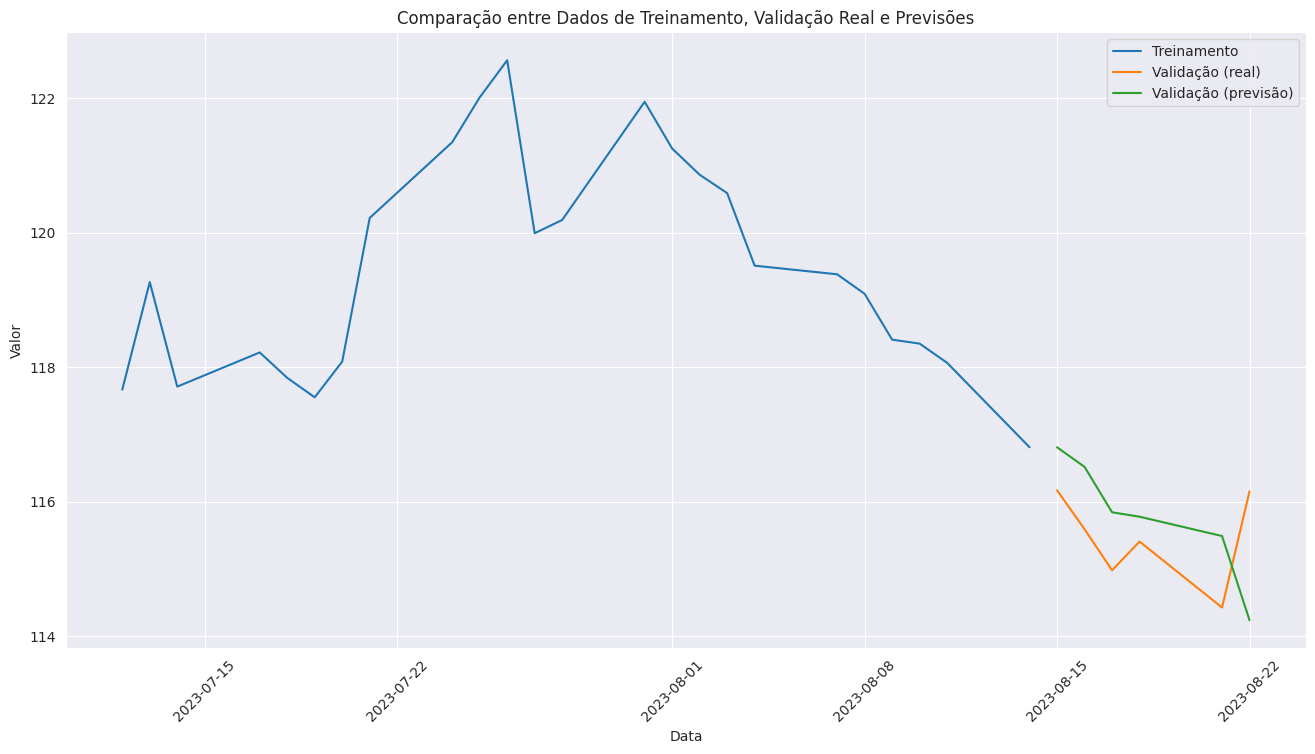

In [ ]:
validation['yhat'] = 0
validation['yhat'] = forecast_valid_adj.values


plt.figure(figsize=(16, 8))
plt.plot(train['ds'], train['y'], label='Treinamento')  # Usando "ds" no eixo x para o treinamento
plt.plot(validation['ds'], validation['y'], label='Valida√ß√£o (real)')  # Usando "ds" no eixo x para a valida√ß√£o real
plt.plot(validation['ds'], validation['yhat'], label='Valida√ß√£o (previs√£o)')  # Usando "ds" no eixo x para as previs√µes
plt.legend()
plt.xticks(rotation=45)  # Rotaciona os r√≥tulos do eixo x para melhorar a legibilidade
plt.xlabel('Data')  # Adiciona r√≥tulo ao eixo x
plt.ylabel('Valor')  # Adiciona r√≥tulo ao eixo y
plt.title('Compara√ß√£o entre Dados de Treinamento, Valida√ß√£o Real e Previs√µes')
plt.show()

In [ ]:
plot_plotly(model_adj,forecast_adj)

In [ ]:
fig = go.Figure([
    go.Scatter(x=train['ds'], y=train['y'], name='Train', mode='lines'),
    go.Scatter(x=validation["ds"], y=validation["y"], name='Validated', mode='lines'),
    go.Scatter(x=validation['ds'], y=validation['yhat'], name='Predicted', mode='lines')])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"), dict(count=1, label="1m", step="month", stepmode="backward"),dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"), dict(count=1, label="1y", step="year", stepmode="backward"), dict(step="all")])))
fig.show()

#### Modelo n√£o usado

In [ ]:
# # Separa√ß√£o das bases entre treino e valida√ß√£o
# periodo_base = int(len(dados_30D) * 0.2)
# train, validation = dados_30D.iloc[:-periodo_base], dados_30D.iloc[-periodo_base:]


# # Treinamento do modelo
# model_adj = Prophet(seasonality_mode="multiplicative", growth="linear") # ajuste de hiperametros
# model_adj.fit(train)


# # Previs√£o do conjunto de teste
# forecast_adj = model_adj.predict(validation)

In [ ]:
# # Plotagem dos dados
# plt.plot(train['ds'], train['y'], label='Treinamento')
# plt.plot(validation["ds"], validation["y"], label="Dados de teste")
# plt.plot(validation['ds'], validation['yhat'], label="Previs√£o")
# plt.fill_between(forecast_adj["ds"], forecast_adj["yhat_lower"], forecast_adj["yhat_upper"], color="gray", alpha=0.2)
# plt.title("Previs√£o com Prophet - Ajustes de Hiperparametros")
# plt.legend()
# plt.show()

In [ ]:
# # Avalia√ß√£o das previs√µes
# wmape_forecast_v4 = wmape(validation["y"].values, forecast_adj["yhat"].values)
# print(f'WMape Adj: {wmape_forecast_v4:.2%}')

# mse_forecast_v4 = mean_squared_error(validation["y"].values, forecast_adj["yhat"].values)
# print(f'MSE Adj: {mse_forecast_v4:.2%}')

# mae_forecast_v4 = mean_absolute_error(validation["y"].values, forecast_adj["yhat"].values)
# print(f'MAE Adj: {mae_forecast_v4:.2%}')

# rmse_forecast_v4 = math.sqrt(mean_absolute_error(validation["y"].values, forecast_adj["yhat"].values))
# print(f'RMSE: {rmse_forecast_v4:.2%}')

### üìä An√°lise 4: Relat√≥rios de performance

In [ ]:
# Avalia√ß√£o das previs√µes

validacao_4 = forecast_adj.set_index('ds')[['yhat']].join(validation.set_index('ds').y).reset_index().dropna()

wmape_forecast_v4 = wmape(validacao_4['y'].values, validacao_4['yhat'].values)
print(f'WMape: {wmape_forecast_v4:.2%}')

mse_forecast_v4 = mean_squared_error(validacao_4['y'].values, validacao_4['yhat'].values)
print(f'MSE: {mse_forecast_v4:.2%}')

mae_forecast_v4 = mean_absolute_error(validacao_4['y'].values, validacao_4['yhat'].values)
print(f'MAE: {mae_forecast_v4:.2%}')

rmse_forecast_v4 = math.sqrt(mean_absolute_error(validacao_4['y'].values, validacao_4['yhat'].values))
print(f'RMSE: {rmse_forecast_v4:.2%}')

WMape: 0.29%
MSE: 17.21%
MAE: 33.34%
RMSE: 57.74%


#### Cross validation

In [ ]:
results_adj = cross_validation(model_adj, initial="24 days", period='1 days', horizon = '6 days') # execute cross validation
metrics_adj = performance_metrics(results_adj) # mensura√ß√£o da performance

In [ ]:
print(results_adj.tail())

           ds        yhat  yhat_lower  yhat_upper        y     cutoff
13 2023-08-11  117.068479  110.180868  123.685914  118.065 2023-08-07
14 2023-08-09  118.705676  117.045221  120.341929  118.409 2023-08-08
15 2023-08-10  118.432209  113.105230  123.372238  118.350 2023-08-08
16 2023-08-11  117.368311  107.342816  127.708703  118.065 2023-08-08
17 2023-08-14  117.226254  101.057578  133.788936  116.810 2023-08-08


In [ ]:
print(metrics_adj)

  horizon       mse      rmse       mae      mape     mdape     smape  \
0  1 days  0.762739  0.873349  0.681909  0.005721  0.002506  0.005746   
1  2 days  1.390056  1.179006  0.848344  0.007117  0.006435  0.007166   
2  3 days  1.609110  1.268507  1.084823  0.009144  0.009577  0.009201   
3  4 days  2.223785  1.491236  1.453011  0.012282  0.013253  0.012362   
4  5 days  4.907348  2.215254  2.181036  0.018455  0.018455  0.018632   
5  6 days  3.386236  1.840173  1.492573  0.012661  0.012661  0.012777   

   coverage  
0  0.666667  
1  0.750000  
2  1.000000  
3  1.000000  
4  1.000000  
5  1.000000  


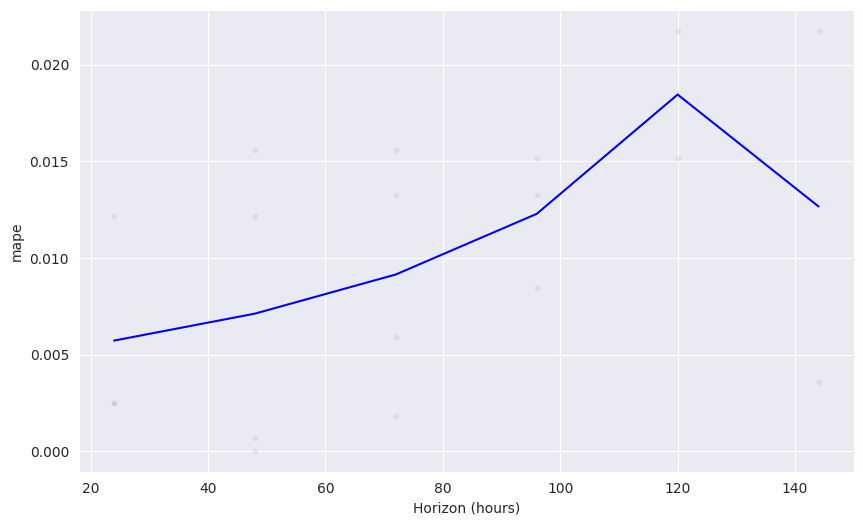

In [ ]:
fig = plot_cross_validation_metric(results_adj, metric='mape')


> No h1, o modelo apresentou baixo erro m√©dio quadrado (MSE) e baixo erro absoluto m√©dio (MAE), indicando que as previs√µes est√£o pr√≥ximas dos valores reais.

> Pela an√°lise da m√©trica de "coverage" tivemos uma cobertura dos intervalos de confian√ßa foi relativamente alta (pr√≥xima de 1.0), o que significa que os intervalos capturaram bem os valores reais.



> A partir do dia 4, os valores de erro MSE e MAE aumentam mais, indicando que o modelo pode ter mais dificuldade em fazer previs√µes precisas para per√≠odos mais distantes no futuro.


#### **O modelo parece ser mais eficiente em prever valores para um horizonte de previs√£o mais curto (1 ou 2 dias), com m√©tricas mais baixas de erro m√©dio e absoluto.**

### üõ†Ô∏è Valida√ß√£o de previs√£o dos dados entre 23 a 28/08
Entendimento se a previs√£o acerta os pr√≥ximos dias p√≥s uso.

In [ ]:
dados_futuro = pd.read_csv("ibov-12.07a29.08.csv", sep=",", parse_dates=[0], index_col="Data",dayfirst=True) # defini√ß√£o da coluna Data como index
dados_futuro.sort_index(inplace=True)
dados_futuro.index.name='ds'
dados_futuro = dados_futuro[["√öltimo"]]
dados_futuro.columns = ["y"]
dados_futuro.reset_index(inplace=True)
dados_futuro

In [ ]:
dados_futuro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      35 non-null     datetime64[ns]
 1   y       35 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 688.0 bytes


In [ ]:
# Separa√ß√£o das bases entre treino e valida√ß√£o
period_data = int(len(dados_futuro) * 0.2)
train_data, test_data = dados_futuro.iloc[:-period_data], dados_futuro.iloc[-period_data:]

# # Separa√ß√£o das bases entre treino e valida√ß√£o
# train_data = dados_futuro.loc[dados_futuro["ds"] < '2023-08-23']
# test_data = dados_futuro.loc[dados_futuro["ds"] >= '2023-08-22']

In [ ]:
# Treinamento do modelo
model_adj = Prophet(seasonality_mode="multiplicative", growth="linear") # ajuste de hiperametros
model_adj.fit(train_data)

# # Previs√£o do conjunto de teste
# forecast_adj = model_adj.predict(test_data)


#predi√ß√µes
future = model_adj.make_future_dataframe(periods=int(len(test_data)), freq='d')
validation_week = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[validation_week]
forecast_future = model_adj.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx92d36nj/f_xj9he6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx92d36nj/2n61c1c0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35042', 'data', 'file=/tmp/tmpx92d36nj/f_xj9he6.json', 'init=/tmp/tmpx92d36nj/2n61c1c0.json', 'output', 'file=/tmp/tmpx92d36nj/prophet_modelws371uem/prophet_model-20230829175005.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:50:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [ ]:
fig = go.Figure([
    go.Scatter(x=train_data["ds"], y=train_data["y"], name='Train', mode='lines'),
    go.Scatter(x=test_data["ds"], y=test_data["y"], name='Validated', mode='lines'),
    go.Scatter(x=forecast_future["ds"], y=forecast_future["yhat"], name='Predicted', mode='lines')
])
fig.show()

In [ ]:
# # Plotagem dos dados
# plt.plot(train_data["ds"], train_data["y"], label="Dados de treino")
# plt.plot(test_data["ds"], test_data["y"], label="Dados de teste")
# plt.plot(forecast_adj["ds"], forecast_adj["yhat"], label="Previs√£o")
# plt.fill_between(forecast_adj["ds"], forecast_adj["yhat_lower"], forecast_adj["yhat_upper"], color="gray", alpha=0.2)
# plt.title("Previs√£o com Prophet - Real vs Futuro")
# plt.legend()
# plt.show()

In [ ]:
# fig = go.Figure([
#     go.Scatter(x=train_data["ds"], y=train_data["y"], name='Train', mode='lines'),
#     go.Scatter(x=test_data["ds"], y=test_data["y"], name='Validated', mode='lines'),
#     go.Scatter(x=forecast_adj["ds"], y=forecast_adj["yhat"], name='Predicted', mode='lines')
# ])
# fig.show()

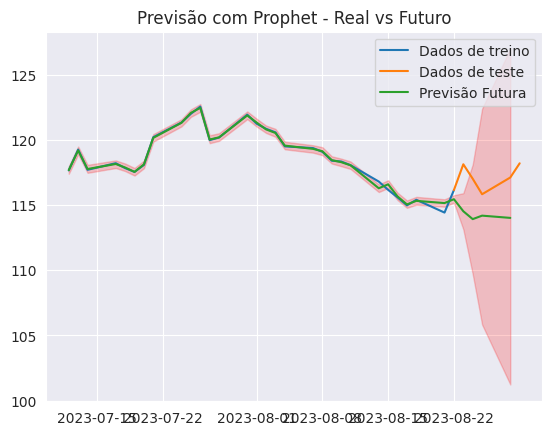

In [ ]:
# Plotagem dos dados
plt.plot(train_data["ds"], train_data["y"], label="Dados de treino")
plt.plot(test_data["ds"], test_data["y"], label="Dados de teste")
# plt.plot(forecast_adj["ds"], forecast_adj["yhat"], label="Previs√£o")
plt.plot(forecast_future["ds"], forecast_future["yhat"], label="Previs√£o Futura")
# plt.fill_between(forecast_adj["ds"], forecast_adj["yhat_lower"], forecast_adj["yhat_upper"], color="gray", alpha=0.2)
plt.fill_between(forecast_future["ds"], forecast_future["yhat_lower"], forecast_future["yhat_upper"], color="red", alpha=0.2)
plt.title("Previs√£o com Prophet - Real vs Futuro")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score #avalia√ß√£o do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report #m√©tricas de avalia√ß√£o

PR√ìXIMAS VALIDA√á√ïES:
- Ao inv√©s de prever o valor final, considerar as oscila√ß√µes se o mercado est√° dubindo ou descendo (deve comprar ou vender a√ß√µes?)

### ‚ùå Constru√ß√£o do modelo com prophet previs√£o di√°ria (N√ÉO FUNCIONOU)

tentando validar o que levantaram no grupo


```
# Acho que estou chegando perto da solu√ß√£o, acredito que o problema √© que estamos tentando prever todo o per√≠odo de teste com base
no comportamento da curva do per√≠odo de treino, quando na verdade a cada nova predi√ß√£o de um dia o modelo deveria ser
"atualizado" com os valores da pr√≥pria previs√£o feita
```



In [ ]:
# selecionar os √∫ltimos 30 dias da base de dados (reduzir o tempo para tentar melhorar a precis√£o)
select = 30
dados_30D = dados_modelo.iloc[-select:]
print(dados_30D["ds"].min())
print(dados_30D["ds"].max())

2023-07-12 00:00:00
2023-08-22 00:00:00


In [ ]:
# Separa√ß√£o das bases entre treino e valida√ß√£o

periodo_base = int(len(dados_30D) * 0.2) # determinando o per√≠odo limite para bases de teste e treino
print("Per√≠odo (80% dos dados):", periodo_base)
train, validation = dados_30D.iloc[:-periodo_base], dados_modelo.iloc[-periodo_base:] # divis√£o dos per√≠odos

Per√≠odo (80% dos dados): 6


In [ ]:
# Treinamento inicial do modelo com prophet com base de treino
init_model = Prophet()
init_model.fit(train)

# Previs√£o iterativa para o conjunto de teste (a c)
previsao = []
for index, row in validation.iterrows():
    forecast = init_model.predict(pd.DataFrame({'ds': [row['ds']]}))
    predicted_value = forecast['yhat'].iloc[0]
    previsao.append(predicted_value)

    # Atualizar o modelo com o valor previsto
    new_data = pd.DataFrame({'ds': [row['ds']], 'y': [predicted_value]})
    init_model = Prophet()
    init_model.fit(pd.concat([train, new_data]))

validation['predictions'] = previsao

In [ ]:
# Plot dos dados reais
plt.figure(figsize=(10, 6))
plt.plot(validation['ds'], validation['y'], label='Real')
plt.plot(validation['ds'], validation['predictions'], label='Previs√µes')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previs√µes vs. Valores Reais')
plt.legend()
plt.show()

In [ ]:
plot_plotly(init_model,forecast)

In [ ]:
# Avalia√ß√£o das previs√µes
wmape_forecast_v2 = wmape(validation['y'].values, validation['predictions'].values)
print(f'WMape: {wmape_forecast_v2:.2%}')

mse_forecast_v2 = mean_squared_error(validation['y'].values, validation['predictions'].values)
print(f'MSE: {mse_forecast_v2:.2%}')

mae_forecast_v2 = mean_absolute_error(validation['y'].values, validation['predictions'].values)
print(f'MAE: {mae_forecast_v2:.2%}')

rmse_forecast_v2 = math.sqrt(mean_absolute_error(validation['y'].values, validation['predictions'].values))
print(f'RMSE: {rmse_forecast_v2:.2%}')



WMape: 0.68%
MSE: 75.71%
MAE: 78.31%
RMSE: 88.49%
